# Exploring MetPy
> As atmospheric scientists, you view, analyze, and synthesize a multitude of datasets every day. 
> These data and model output are collected by numerous entities and are stored in disparate locatons. 
> Luckily, we have access to the THREDDS catalog which nicely aggregates and organizes that data for us.
> Using MetPy, we can programmatically access, analyze, and display those data for our specific needs on demand. 

## Table of Contents <a class="anchor" id="top"></a>

* [Objective](#objective)
* [Strategy](#strategy)
* [Step 0: Import required packages](#step0)
* [Step 1: Browse the THREDDS Data Server (TDS)](#step1)
* [Step 2: Satellite data](#step2)
    * [Step 2a: Obtain Satellite data](#step2a)
    * [Step 2b: Prepare Satellite data](#step2b)
    * [Step 2c: Visualize Satellite data](#step2c)
* [Step 3: Model output, equivalent potential temperature ($\theta_e$)](#step3)
    * [Step 3a: Obtain Model Output](#step3a)
    * [Step 3b: Prepare Model Output](#step3b)
    * [Step 3c: Visualize Model Output](#step3c)
* [Step 4: Surface observations](#step4)
    * [Step 4a: Obtain Surface observations](#step4a)
    * [Step 4b: Prepare Surface observations](#step4b)
    * [Step 4c: Visualize Surface observations](#step4c)
* [Step 5: Create multi-layer plot](#step5)

## Objective
> Today, you will explore a few of the many uses of MetPy by creating a multi-layer plot like this one. Plots like these are ubiquitous in research, forecasting, and education. You may have seen a plot like this in a textbook! 

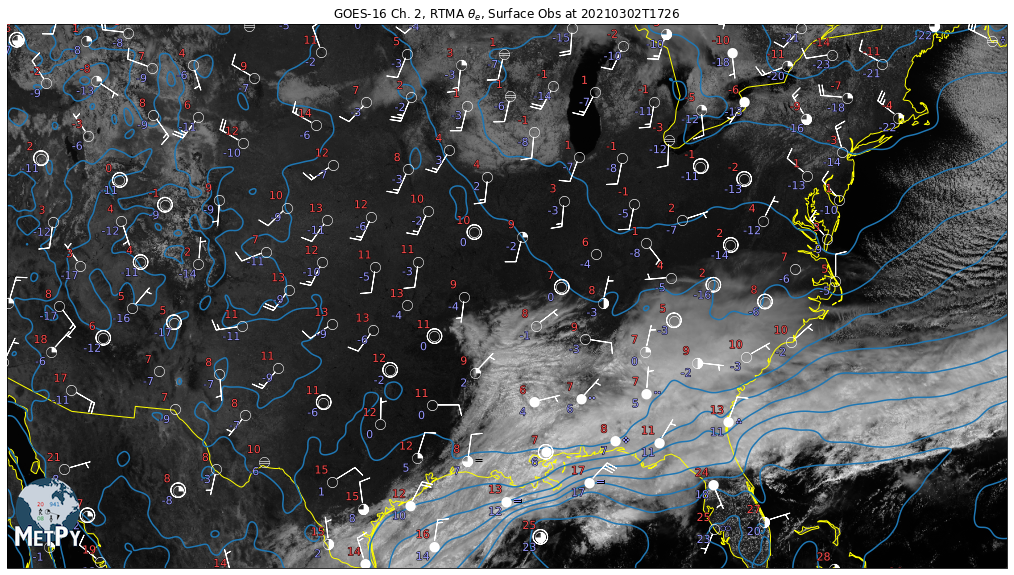

## Strategy <a class="anchor" id="strategy"></a>
> Creating plots like this using MetPy follows this workflow:

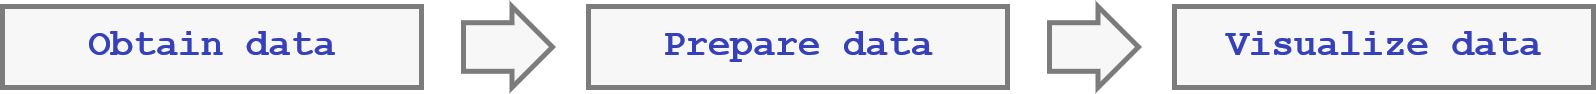

> Since the plot you will be creating today includes three layers (satellite imagery, model output, and surface observations), you will repeat this process three times. With each iteration, you will discover nuances of each data product, what the product looks like on its own, and how to prepare it for a final production-quality plot. 

<div>

</div>

## Step 0: Import required packages <a class="anchor" id="step0"></a>
[Top](#top)
> But first, we need to import all our required packages. Today we're working with:
> - datetime
> - numpy
> - cartopy
> - matplotlib
> - metpy
> - siphon

In [1]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Notice that we will use "plt" to access matplotlib
import matplotlib.pyplot as plt

import metpy.calc as mpcalc
import metpy.plots as mpplots

import numpy as np

from matplotlib.patheffects import withStroke
from metpy.io import parse_metar_file
from metpy.units import pandas_dataframe_to_unit_arrays

# Here is where we import the TDSCatalog class from siphon for obtaining our data 
from siphon.catalog import TDSCatalog



## Step 1: Browse the THREDDS Data Server (TDS) <a class="anchor" id="step1"></a>
[Top](#top)

*Breakout room activity*

> The **THREDDS Data Server** provides us with coherent access to a large collection of real-time and archived datasets from a variety of environmental data sources at a number of distributed server sites. 
> You can browse the TDS in your web browser using this link: 

<a href="https://thredds.ucar.edu/" target ="blank">https://thredds.ucar.edu/</a>


> ``Instructions`` In your breakout rooms, take a few moments to browse the catalog in a new tab of your web browser. Then, as a group, find the following information in the cell below. Determine **one representative** from each room to log the information in the cell below and share with the larger group at the end of the activity. 

1. Find the URL for current GOES East Cloud and Moisture Imagery, Channel 02, CONUS extent

Answer: https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/CloudAndMoistureImagery/CONUS/Channel02/current/catalog.html

2. What data format are these data stored in?

Answer: netcdf

3. Find the URL for the full collection of the Real Time Mesoscale Analysis output

Answer: https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/catalog.html?dataset=grib/NCEP/RTMA/CONUS_2p5km/TP

4. What data format are these data stored in?

Answer: grib2

## Step 2: Satellite Data <a class="anchor" id="step2"></a>
[Top](#top)
> The first layer we will obtain is satellite imagery. To do this, we will create a THREDDS Data Server (TDS) catalog object, then extract a single image with its metadata, and visualize the result in a simple plot. For these tasks, we will use xarray to store the information in memory.

<div>
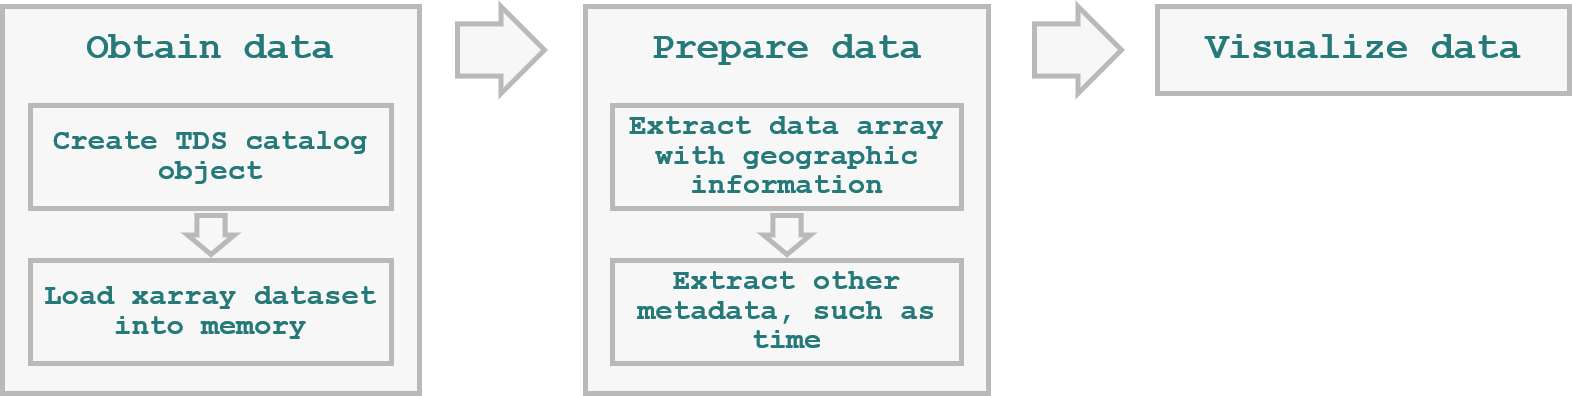
</div>

### Step 2a: Obtain Satellite Data <a class="anchor" id="step2a"></a>
[Top](#top)

In [2]:
#  Create TDS catalog object Notice the URL ends with .xml rather than .html This is because while your web browser uses html to show you the data in a nice,
# human-friendly webpage, siphon requires an xml document to read the data properly. 
satcat = TDSCatalog(
    "https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/CloudAndMoistureImagery/CONUS/Channel02/current/catalog.xml"
)

# satcat includes many images as a part of the dataset
# choose the first (most recent) image in the data set, index = 0
satdata = satcat.datasets[0].remote_access(use_xarray=True)
satdata

<xarray.Dataset>
Dimensions:               (x: 10000, y: 6000)
Coordinates:
    time                  datetime64[ns] ...
  * y                     (y) float32 1.282e+05 1.282e+05 ... 4.425e+04
  * x                     (x) float32 -1.014e+05 -1.013e+05 ... 3.863e+04
Data variables:
    Sectorized_CMI        (y, x) float32 ...
    fixedgrid_projection  int32 ...
Attributes:
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  2
    central_wavelength:          0.64
    abi_mode:                    6
    source_scene:                CONUS
    periodicity:                 5.0
    production_location:         WCDAS
    product_name:                ECONUS-005-B12-M6C02
    satellite_id:                GOES-16
    product_center_latitude:     30.08300267372796
    product_center_longitude:    -87.09695844824527
    projection:                  Fixed Grid
    bit_depth:                   12
    source_spatial_resolution:   0.5
    request_spatial_resolution:  0.5
    start_date_time:             2021068195615
    number_product_tiles:        15
    product_tile_width:          2048
    product_tile_height:         2048
    product_rows:                6000
    product_columns:             10000
    pixel_x_size:                0.5
    pixel_y_size:                0.5
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      15

### Step 2b: Prepare Satellite Data <a class="anchor" id="step2b"></a>
[Top](#top)

In [3]:
# extract data array with geographic information
cmi = satdata.metpy.parse_cf("Sectorized_CMI")

# extract the date and time of the most recent array
dt = datetime.strptime(satdata.attrs["start_date_time"], "%Y%j%H%M%S")

In [4]:
print(satdata.attrs["start_date_time"] , " is ",  dt)

2021068195615  is  2021-03-09 19:56:15


### Step 2c: Visualize Satellite Data <a class="anchor" id="step2c"></a>
[Top](#top)
#### ACTIVITY: Plot CMI

> Now that we have the data ready, it's time to **plot**. Incrementally plotting data is considered a best practice for understanding the data you are working with and determining if you are on your way to creating your intended product. 
> To plot this image, we will use **matplotlib** to display our data. Let's first make sure we have the information we need:
> - What is the name of the dataarray variable we need to plot?
> - What is the matplotlib function to use?
> - What is the correct syntax for using the function?

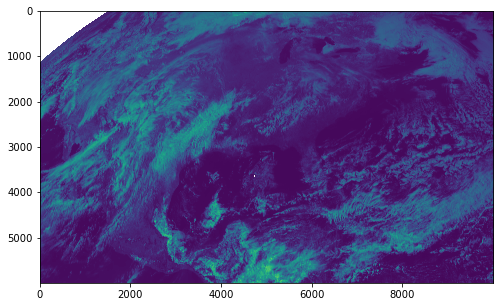

In [10]:
# ACTIVITY: Plot CMI 
# Create your plot code below
fig = plt.figure(figsize=[12,5])
plt.imshow(cmi)
plt.show()

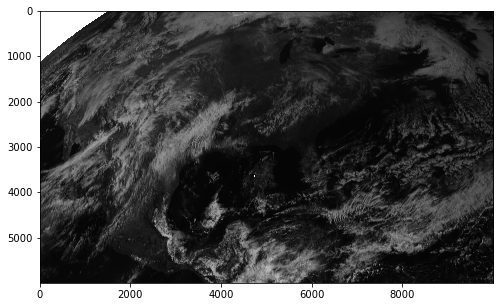

In [11]:
# CHALLENGE: Plot CMI
# Using the matplotlib documentation as a reference, 
# change the color map of your above plot to grayscale
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
fig = plt.figure(figsize=[12,5])
plt.imshow(cmi, cmap='gray')

## Step 3: Model output, equivalent potential temperature ($\theta_e$) <a class="anchor" id="step3"></a>
[Top](#top)
>Now we grab data from the Real-time Meso-analysis (RTMA), which gives us a gridded estimate of the realtime conditions. Our goal is to use MetPy to calculate <a href="https://glossary.ametsoc.org/wiki/Equivalent_potential_temperature" target="blank">equivalent potential temperature ($\theta_e$)</a>, using the fields we have available in the RTMA. 

> This time we will also add some additional detail to our intermediate plot. To provide geographic reference, we will plot with a geographic projection and add coastlines. 

<div>
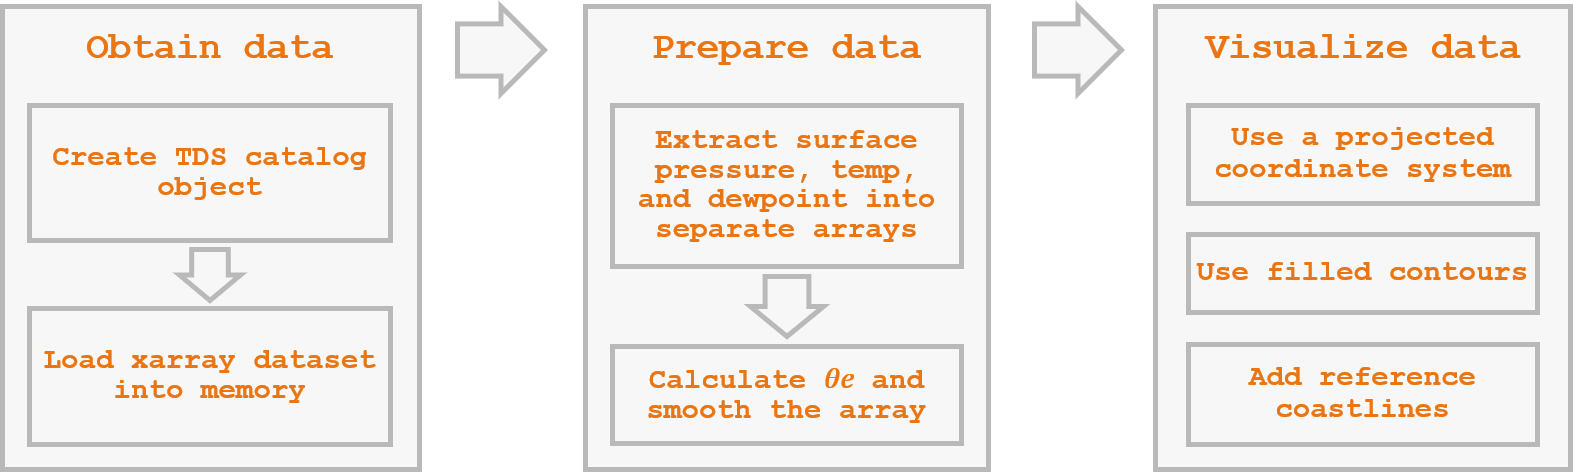
</div>

### Step 3a: Obtain Model Output <a class="anchor" id="step3a"></a>
[Top](#top)

In [12]:
# Again using Siphon, get the full collection of RTMA 
# data opened using xarray.
rtma_cat = TDSCatalog('https://thredds.ucar.edu/thredds/catalog/grib/NCEP/RTMA/CONUS_2p5km/catalog.xml')
rtma_data = rtma_cat.datasets['Full Collection Dataset'].remote_access(use_xarray=True)
rtma_data = rtma_data.metpy.parse_cf()

### Step 3b: Prepare Model Output <a class="anchor" id="step3b"></a>
[Top](#top)

> Before we calculate any derived variables, we need to look up the required input variables. Looking at the metpy.calc documentation <a href ="https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.equivalent_potential_temperature.html#metpy.calc.equivalent_potential_temperature" target="blank">equivalent potential temperature</a>, we can see that this function requires three variables: surface pressure, temperature, and dewpoint. Each of these variables are contained in our rtma_data Dataset, but we need to know what variable name each are stored under. 

In [16]:
# ACTIVITY: Examine variables in xarray Dataset
# rtma_data is an xarray Dataset containing several different variables. 
# Use the space below to programmatically display the list of all
# variables in the Dataset.
rtma_data

<xarray.Dataset>
Dimensions:                                                              (: 2, altitude_above_msl: 1, height_above_ground: 1, height_above_ground1: 1, time: 736, time1: 740, time2: 739, x: 2145, y: 1377)
Coordinates:
  * time                                                                 (time) datetime64[ns] ...
    reftime                                                              (time) datetime64[ns] ...
  * x                                                                    (x) float32 ...
  * y                                                                    (y) float32 ...
  * altitude_above_msl                                                   (altitude_above_msl) float32 ...
    metpy_crs                                                            object ...
  * time1                                                                (time1) datetime64[ns] ...
    reftime1                                                             (time1) datetime64[ns] ...
  * height_above_ground1                                                 (height_above_ground1) float32 ...
  * height_above_ground                                                  (height_above_ground) float32 ...
  * time2                                                                (time2) datetime64[ns] ...
    reftime2                                                             (time2) datetime64[ns] ...
Dimensions without coordinates: 
Data variables:
    LambertConformal_Projection                                          >i4 0
    time_bounds                                                          (time, ) datetime64[ns] ...
    Total_precipitation_Forecast_altitude_above_msl_1_Hour_Accumulation  (time, altitude_above_msl, y, x) float32 ...
    Total_cloud_cover_Analysis_entire_atmosphere_single_layer            (time1, y, x) float32 ...
    Pressure_error_surface                                               (time1, y, x) float32 ...
    Wind_direction_from_which_blowing_error_height_above_ground          (time1, height_above_ground1, y, x) float32 ...
    Wind_speed_error_height_above_ground                                 (time1, height_above_ground1, y, x) float32 ...
    Wind_speed_gust_error_height_above_ground                            (time1, height_above_ground1, y, x) float32 ...
    Wind_speed_gust_Analysis_height_above_ground                         (time1, height_above_ground1, y, x) float32 ...
    Dewpoint_temperature_error_height_above_ground                       (time1, height_above_ground, y, x) float32 ...
    Temperature_error_height_above_ground                                (time1, height_above_ground, y, x) float32 ...
    Total_cloud_cover_error_entire_atmosphere_single_layer               (time1, y, x) float32 ...
    Visibility_error_surface                                             (time1, y, x) float32 ...
    Pressure_Analysis_surface                                            (time1, y, x) float32 ...
    Temperature_Analysis_height_above_ground                             (time1, height_above_ground, y, x) float32 ...
    Visibility_Analysis_surface                                          (time2, y, x) float32 ...
    Wind_direction_from_which_blowing_Analysis_height_above_ground       (time1, height_above_ground1, y, x) float32 ...
    Wind_speed_Analysis_height_above_ground                              (time1, height_above_ground1, y, x) float32 ...
    u-component_of_wind_Analysis_height_above_ground                     (time1, height_above_ground1, y, x) float32 ...
    v-component_of_wind_Analysis_height_above_ground                     (time1, height_above_ground1, y, x) float32 ...
    Geopotential_height_Analysis_surface                                 (time1, y, x) float32 ...
    Dewpoint_temperature_Analysis_height_above_ground                    (time1, height_above_ground, y, x) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    

> Now we pull out the fields (variables) we need for the calculation: surface pressure, surface temperature, and surface dewpoint. Here we are making use of xarray and MetPy to select the particular time we want. 

> Notice the use of the `squeeze()` method. This helps eliminate any stray dimensions for the vertical since we want a 2D array as output (some values are at a particular height, like 2 m, rather than the surface).

In [17]:
# From the list of variables in rtma_data, we will pull 
# "Pressure_Analysis_surface" out of the dataset for our 
# surface pressure. 
pres = rtma_data.Pressure_Analysis_surface.metpy.sel(time=dt, method='nearest').squeeze()

In [19]:
pres

<xarray.DataArray 'Pressure_Analysis_surface' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+06 -2.761e+06 ... 2.679e+06 2.682e+06
  * y          (y) float32 -2.638e+05 -2.612e+05 ... 3.228e+06 3.231e+06
    metpy_crs  object Projection: lambert_conformal_conic
    time1      datetime64[ns] 2021-03-09T19:00:00
    reftime1   datetime64[ns] 2021-03-09T19:00:00
Attributes:
    long_name:                      Pressure Analysis @ Ground or water surface
    units:                          Pa
    abbreviation:                   PRES
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-3-0_L1
    Grib2_Parameter:                [0 3 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Pressure
    Grib2_Level_Type:               1
    Grib2_Level_Desc:               Ground or water surface
    Grib2_Generating_Process_Type:  Analysis

In [23]:
# ACTIVITY: Prepare temperature and dewpoint
# Using the information above, create a temp and dewp 
# variable that represent the surface temperature and 
# dewpoint, respectively. 

temp = rtma_data.Temperature_Analysis_height_above_ground.metpy.sel(time=dt, method='nearest').squeeze()
# temp = rtma_data["Temperature_Analysis_height_above_ground"].metpy.sel(time=dt, method='nearest').squeeze()
dewp = rtma_data.Dewpoint_temperature_Analysis_height_above_ground.metpy.sel(time=dt, method='nearest').squeeze()
# dewp = rtma_data["Dewpoint_temperature_Analysis_height_above_ground"].metpy.sel(time=dt, method='nearest').squeeze()

In [24]:
temp

<xarray.DataArray 'Temperature_Analysis_height_above_ground' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x                    (x) float32 -2.763e+06 -2.761e+06 ... 2.682e+06
  * y                    (y) float32 -2.638e+05 -2.612e+05 ... 3.231e+06
    metpy_crs            object Projection: lambert_conformal_conic
    time1                datetime64[ns] 2021-03-09T19:00:00
    reftime1             datetime64[ns] 2021-03-09T19:00:00
    height_above_ground  float32 2.0
Attributes:
    long_name:                      Temperature Analysis @ Specified height l...
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-0-0_L103
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               103
    Grib2_Level_Desc:               Specified height level above ground
    Grib2_Generating_Process_Type:  Analysis

In [25]:
dewp

<xarray.DataArray 'Dewpoint_temperature_Analysis_height_above_ground' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x                    (x) float32 -2.763e+06 -2.761e+06 ... 2.682e+06
  * y                    (y) float32 -2.638e+05 -2.612e+05 ... 3.231e+06
    metpy_crs            object Projection: lambert_conformal_conic
    time1                datetime64[ns] 2021-03-09T19:00:00
    reftime1             datetime64[ns] 2021-03-09T19:00:00
    height_above_ground  float32 2.0
Attributes:
    long_name:                      Dewpoint temperature Analysis @ Specified...
    units:                          K
    abbreviation:                   DPT
    grid_mapping:                   LambertConformal_Projection
    Grib_Variable_Id:               VAR_0-0-6_L103
    Grib2_Parameter:                [0 0 6]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Dewpoint temperature
    Grib2_Level_Type:               103
    Grib2_Level_Desc:               Specified height level above ground
    Grib2_Generating_Process_Type:  Analysis

> Now calculate equivalent potential temperature using the  <a href ="https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html" target="blank">metpy.calc documentation</a>

In [27]:
# ACTIVITY: Calculate theta_e
# Create a variable called theta_e to represent the 
# equivalent potential temperature field

theta_e = mpcalc.equivalent_potential_temperature(pres, temp,dewp)
theta_e

<xarray.DataArray (y: 1377, x: 2145)>
<Quantity([[323.5999  322.94455 322.572   ... 342.71045 342.73917 342.73917]
 [323.36636 323.07025 322.65768 ... 342.71045 342.73917 342.73917]
 [323.22903 323.16037 323.0128  ... 342.71045 342.73917 342.73917]
 ...
 [292.32166 292.40015 292.6583  ... 277.12994 277.1282  277.11786]
 [292.3982  292.40976 292.47794 ... 277.12137 277.11276 277.11362]
 [292.23978 292.3168  292.48755 ... 277.10168 277.10422 277.1085 ]], 'kelvin')>
Coordinates:
  * x                    (x) float32 -2.763e+06 -2.761e+06 ... 2.682e+06
  * y                    (y) float32 -2.638e+05 -2.612e+05 ... 3.231e+06
    metpy_crs            object Projection: lambert_conformal_conic
    time1                datetime64[ns] 2021-03-09T19:00:00
    reftime1             datetime64[ns] 2021-03-09T19:00:00
    height_above_ground  float32 2.0

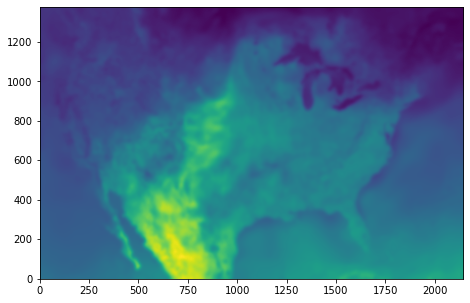

In [103]:
# CHALLENGE: Calculate another variable
# Locate another derived variable in the metpy.calc documentation 
# that takes in any combination of surface pressure, temperature, 
# or dewpoint, then calculate it as a new variable. Plot it using 
# any plotting tool to visualize the output.

sat_theta_e = mpcalc.saturation_equivalent_potential_temperature(pres, temp)
sat_theta_e = mpcalc.smooth_gaussian(sat_theta_e, n=50)

fig = plt.figure(figsize=[12,5])
# ax = plt.axes(projection=ccrs.Robinson())
# ax.contourf(sat_theta_e['x'], sat_theta_e['y'], sat_theta_e, transform=rtma_crs)
# ax.coastlines('10m')
plt.imshow(sat_theta_e,origin='lower')

In [35]:
lats

<xarray.DataArray 'y' (y: 1377)>
array([-263789.44, -261249.72, -258710.02, ..., 3225762.5 , 3228302.  ,
       3230841.8 ], dtype=float32)
Coordinates:
  * y          (y) float32 -2.638e+05 -2.612e+05 ... 3.228e+06 3.231e+06
    metpy_crs  object Projection: lambert_conformal_conic
Attributes:
    standard_name:        projection_y_coordinate
    units:                meters
    _CoordinateAxisType:  GeoY
    _metpy_axis:          y

In [36]:
# Smooth the theta_e array using a gaussian filter.
# This will improve the readability of the final plot.
theta_e = mpcalc.smooth_gaussian(theta_e, n=50)

>Recall using cartopy's `crs` <a href="https://scitools.org.uk/cartopy/docs/latest/crs/index.html#cartopy.crs.CRS">(cartographic reference systems)</a> projections from Day 1 of this workshop. 

>We can use MetPy shortcuts to create one of these objects for our data. This will help us during plotting, and can be used to change the geographic projection of our data on demand. This is the final preparation step we will take before plotting our data. 

In [38]:
# Create the crs object for the theta_e array
rtma_crs = theta_e.metpy.cartopy_crs
rtma_crs

### Step 3c: Visualize Model Output <a class="anchor" id="step3c"></a>
[Top](#top)
> The data are now prepared for plotting. Let's now use a different plotting technique, **filled contours**, for visualizing the $\theta_e$ field. Let's also project the field into the **Robinson** projection.  

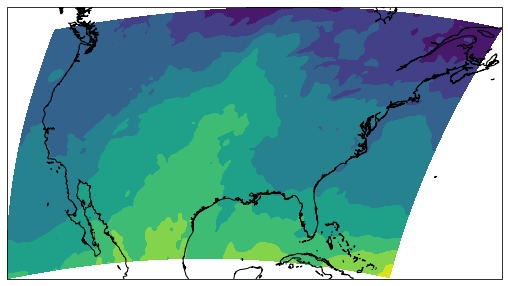

In [45]:
# Create axes, then use contourf to create filled contours of the theta_e field
fig = plt.figure(figsize=[12,5])
ax = plt.axes(projection=ccrs.Robinson())
ax.contourf(theta_e['x'], theta_e['y'], theta_e, transform=rtma_crs)

# ACTIVITY: Plot coastlines
# What single line of code is needed to add 
# coastlines to the above plot?
ax.coastlines('10m')

>**TIP:** If you are working with xarray dataarrays parsed via `metpy.parse_cf`, and you aren't sure what your horizontal variables (e.g. `x` or `lon` or `latitude`) are named, or you just want a shortcut, you can access these quickly with `xarray.metpy.x` and `xarray.metpy.y`



>For example, these two lines of code are equivalent for dataarrays parsed with metpy.parse.cf:

`ax.contourf(theta_e['x'], theta_e['y'], theta_e, transform=rtma_crs)`

`ax.contourf(theta_e.metpy.x, theta_e.metpy.y, theta_e, transform=rtma_crs)`

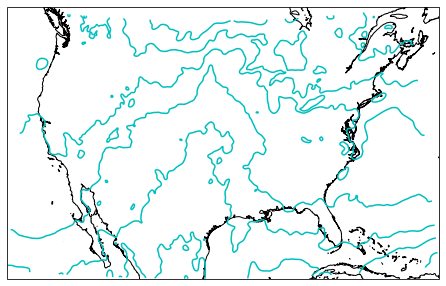

In [52]:
# ACTIVITY: Contour plot
# Our final plot will use the LambertConformal projection,
# the same projection the RTMA dataset uses. We also will
# not use filled contours, since they must be plotted 
# overtop of a satellite image. 
# 
# Re-plot the map above using the same projection as the 
# RTMA dataset, use the contour() plot type, and include 
# coastlines. 
#
# Matplotlib contour():
#    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html
#
# CHALLENGE: Single color contours
# Create the contour plot where all contours are a 
# single color of your choosing.

fig = plt.figure(figsize=[12,5])
ax = plt.axes(projection=ccrs.LambertConformal())
# ax.contour(theta_e['x'], theta_e['y'], theta_e, transform=rtma_crs, colors='c') # we know the variable name for coords
ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e, transform=rtma_crs, colors='c') # we dont know the variable name for coords

# ACTIVITY: Plot coastlines
# What single line of code is needed to add 
# coastlines to the above plot?
ax.coastlines('10m')

## Step 4: Surface Observations <a class="anchor" id="step4"></a>
[Top](#top)
>Finally, we will add <a href ="https://www.wpc.ncep.noaa.gov/html/stationplot.shtml" target="blank">station plots</a> to our map. Creating a map of station plots is a bit different from our previous two map layers. We're no longer looking at 2D arrays of data, and instead we're looking at a collection of points containing several observations. Despite those differences, though, the same general workflow applies: obtain, prepare, and plot the data. However, the details of each will differ greatly from the satellite and $\theta_e$ plots.  

<div>
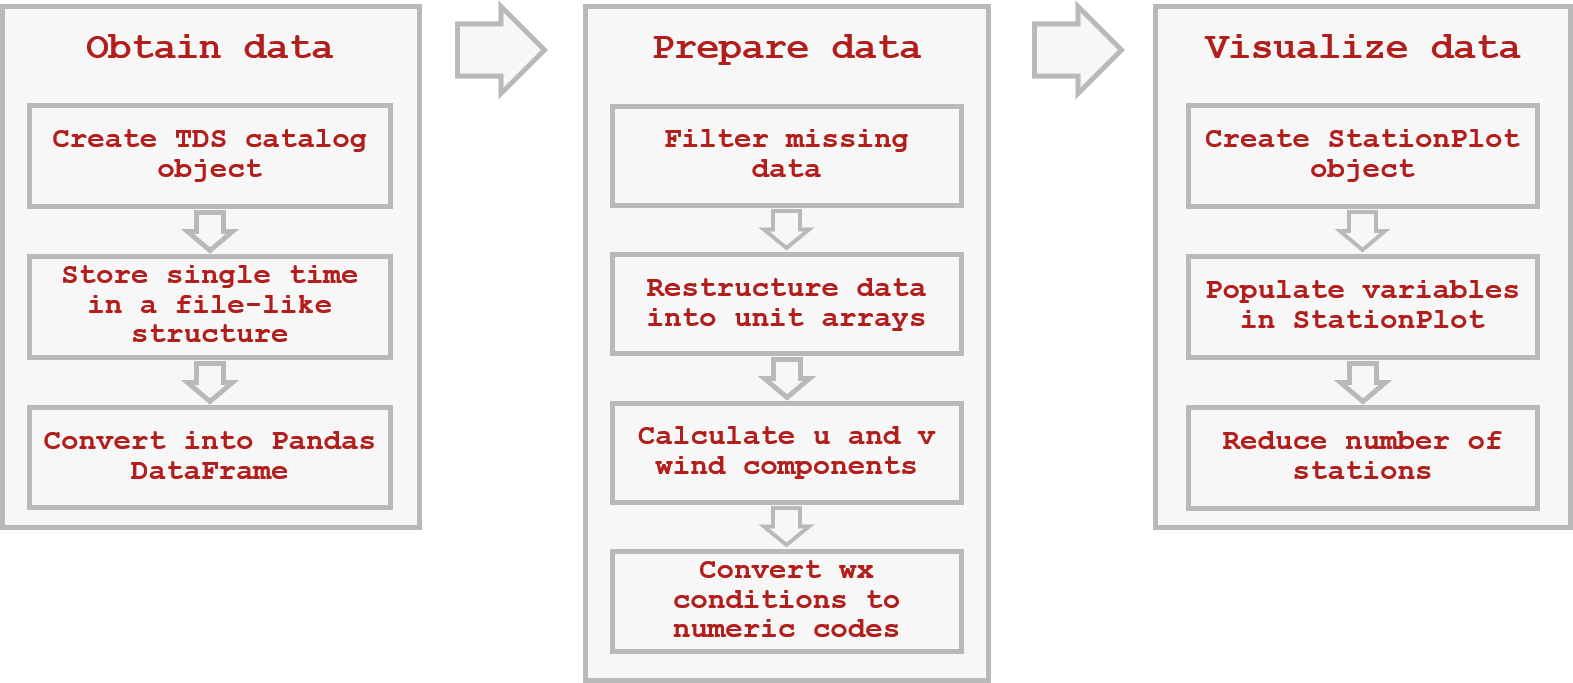
</div>

### Step 4a: Obtain Surface Observations <a class="anchor" id="step4a"></a>
[Top](#top)

In [53]:
# METAR information is stored in a different 
# location from the previous THREDDS catalog, 
# notice the change in URL.
metar_cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

# Open the metar file that contains data
# closest to the satellite image time, dt
metar_text = metar_cat.datasets.filter_time_nearest(dt).remote_open(mode='t')

### Step 4b: Prepare Surface Observations <a class="anchor" id="step4b"></a>
[Top](#top)

> `metar_text` now holds an object containing our METAR data in ascii text. Now we will prepare the data for plotting by converting it into a pandas DataFrame object using `parse_metar_file()`. A pandas DataFrame is similar to a spreadsheet in that the data are stored into rows and columns. 

> Example:
<div>
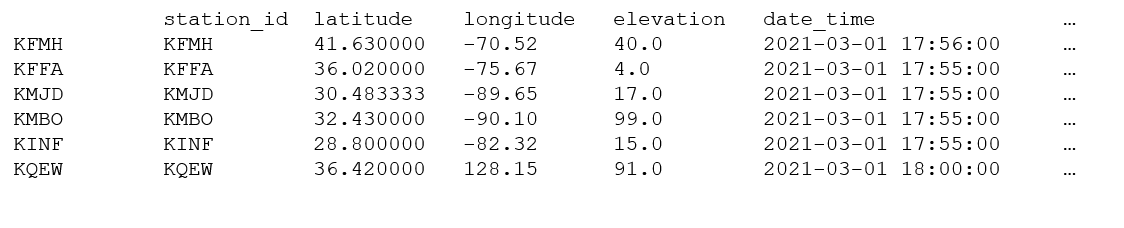
</div>

> This structure allows us to more easily apply some quality control. Using Pandas, we will remove stations that do not have a useful lat/lon value (empty or null), as well as set missing current weather observations to an empty string.

In [59]:
# parse_metar_file() outputs a pandas DataFrame
sfc_data = parse_metar_file(metar_text, year=dt.year, month=dt.month)

# Save the units for all columns to a new variable
sfc_units = sfc_data.units

# Filter out missing lat/lon data
sfc_data = sfc_data[sfc_data.latitude.notna() & sfc_data.longitude.notna()]

# Set missing weather condition data to an empty string, ''
sfc_data['current_wx1'][sfc_data['current_wx1'].isna()] = ''

In [60]:
sfc_data.head()


station_id   latitude  longitude  elevation           date_time  \
TJBQ       TJBQ  18.500000     -67.13       72.0 2021-03-09 19:50:00   
KFFA       KFFA  36.020000     -75.67        4.0 2021-03-09 19:55:00   
KMJD       KMJD  30.483333     -89.65       17.0 2021-03-09 19:55:00   
KM25       KM25  36.770000     -88.58      160.0 2021-03-09 19:55:00   
KINF       KINF  28.800000     -82.32       15.0 2021-03-09 19:55:00   

      wind_direction  wind_speed current_wx1 current_wx2 current_wx3  ...  \
TJBQ            70.0        19.0                     NaN         NaN  ...   
KFFA             0.0         0.0                     NaN         NaN  ...   
KMJD             0.0         0.0                     NaN         NaN  ...   
KM25           210.0        10.0                     NaN         NaN  ...   
KINF            80.0         5.0                     NaN         NaN  ...   

     cloud_coverage air_temperature dew_point_temperature  altimeter  \
TJBQ              0            28.0                  20.0      30.05   
KFFA              0            18.0                  -2.0      30.42   
KMJD              6            23.0                  11.0      30.42   
KM25              0            20.0                   5.0      30.34   
KINF              4            24.0                   9.0      30.44   

     present_weather  past_weather past_weather2  air_pressure_at_sea_level  \
TJBQ               0             0             0                    1017.53   
KFFA               0             0             0                    1030.44   
KMJD               0             0             0                    1030.39   
KM25               0             0             0                    1027.41   
KINF               0             0             0                    1031.07   

      eastward_wind  northward_wind  
TJBQ     -17.854160       -6.498383  
KFFA      -0.000000       -0.000000  
KMJD      -0.000000       -0.000000  
KM25       5.000000        8.660254  
KINF      -4.924039       -0.868241  

[5 rows x 28 columns]

In [61]:
print(sfc_units)

{'station_id': None, 'latitude': 'degrees', 'longitude': 'degrees', 'elevation': 'meters', 'date_time': None, 'wind_direction': 'degrees', 'wind_speed': 'kts', 'eastward_wind': 'kts', 'northward_wind': 'kts', 'current_wx1': None, 'current_wx2': None, 'current_wx3': None, 'low_cloud_type': None, 'low_cloud_level': 'feet', 'medium_cloud_type': None, 'medium_cloud_level': 'feet', 'high_cloud_type': None, 'high_cloud_level': 'feet', 'highest_cloud_type': None, 'highest_cloud_level:': None, 'cloud_coverage': None, 'air_temperature': 'degC', 'dew_point_temperature': 'degC', 'altimeter': 'inHg', 'air_pressure_at_sea_level': 'hPa', 'present_weather': None, 'past_weather': None, 'past_weather2': None}


> Now we convert the Pandas DataFrame object into a dictionary object, where each column is now a unique key. This structure is what MetPy requires for creating the final station plot.
<div>
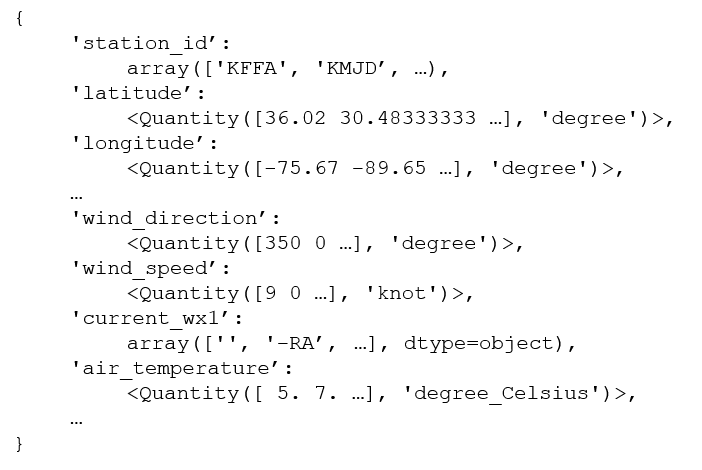
</div>


In [62]:
# Create final data structure
sfc_data = pandas_dataframe_to_unit_arrays(sfc_data, sfc_units)

In [81]:
sfc_data.keys()

dict_keys(['station_id', 'latitude', 'longitude', 'elevation', 'date_time', 'wind_direction', 'wind_speed', 'current_wx1', 'current_wx2', 'current_wx3', 'low_cloud_type', 'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level', 'high_cloud_type', 'high_cloud_level', 'highest_cloud_type', 'highest_cloud_level', 'cloud_coverage', 'air_temperature', 'dew_point_temperature', 'altimeter', 'present_weather', 'past_weather', 'past_weather2', 'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind', 'wx_code'])

> The final preparation step is to prepare the current weather conditions. METARs use <a href="https://www.weather.gov/media/wrh/mesowest/metar_decode_key.pdf" target="blank">text abbreviations</a> to denote the current weather conditions, but MetPy requires that these codes be converted to the <a href="https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.StationPlot.html#metpy.plots.StationPlot.plot_symbol" target="blank">World Meteorological Organization (WMO) numerical code</a> for plotting. 

> For example:
<div>
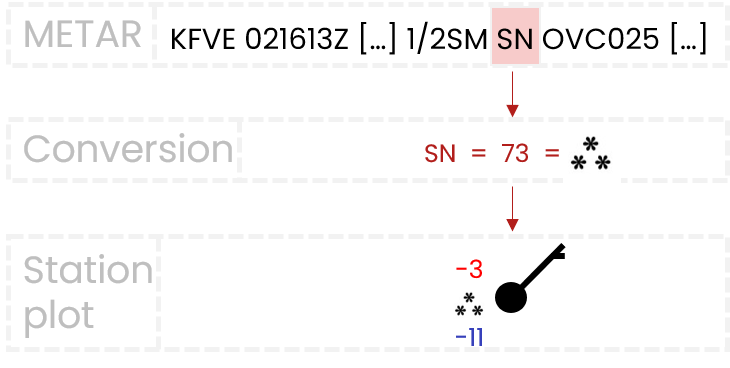
</div>


> We will do this conversion by passing the `current_wx1` key from the `sfc_data` dictionary through the <a href="https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.wx_code_to_numeric.html" target="blank">wx_code_to_numeric()</a> MetPy function.

In [82]:
# ACTIVITY: Convert wx code
# Convert weather (wx) abbreviation to WMO numeric wx code
# using the documentation linked above. 
 
sfc_data['wx_code'] = mpplots.wx_code_to_numeric(sfc_data['current_wx1'])
sfc_data['station_id'][np.where(sfc_data['wx_code'] == 73)[0]]

array(['EETN', 'PAEC', 'KBLU', 'KBLU', 'LYUZ', 'CYPX', 'EETN', 'LYUZ',
       'KMHS', 'EETN', 'CYLH'], dtype=object)

In [88]:
# ACTIVITY: Calculate u and v wind
# The METAR reports wind as speed and direction, 
# but MetPy needs wind data as u and v components 
# for plotting. 
# Review the wind_components documentation and/or
# a code sample for a similar plot type, then 
# write the u wind component to sfc_data['u']
# and the v wind component to sfc_data['v']
# Documentation:
# https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.wind_components.html
# Code sample:
# https://unidata.github.io/MetPy/latest/examples/plots/Mesonet_Stationplot.html

sfc_data['u'], sfc_data['v'] = mpcalc.wind_components(sfc_data['wind_speed'],sfc_data['wind_direction'])


array([-6.49838272, -0.        , -0.        , ..., -3.93923101,
       -8.45723359,  3.        ]) <Unit('knot')>

### Step 4c: Visualize Surface Observations <a class="anchor" id="step4c"></a>
[Top](#top)

> Now that we have completed all of our data preparation, we can start building the station plot. To do this, we need MetPy's [`StationPlot` class](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.StationPlot.html). The `StationPlot` class acts as a template that we fill in with the surface observations stored in the `sfc_data` variable.
> The station plot is broken up into regions surrounding a center point. The variables we'll be plotting are:
>1. air temperature (red, north west `NW` region)
>2. dew point temperature (blue, south west `SW` region)
>3. cloud coverage (white, center `C` region)
>4. current weather symbol/wx code (blue, east `E` region)
>5. wind speed and direction (wind barb). 

>Example: 
<div>
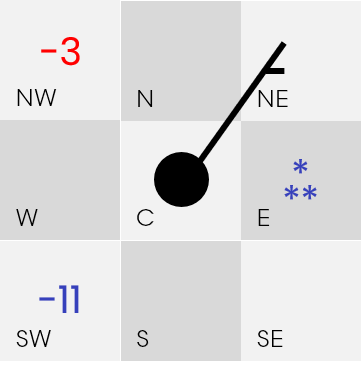
</div>



> **NOTE:** We are making a few changes from the standard station plot for accessibility and readability. Traditionally, the dewpoint value is displayed in *green*. However, we are making a modification to make our final plot more accessible to colorblindness. We are also moving the wx code to the east (as oppposed to west) to increase readability.

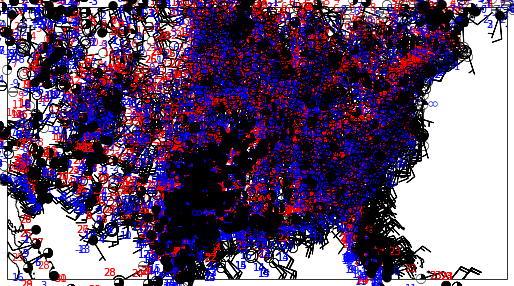

In [92]:
# Start by creating the matplotlib axes
fig = plt.figure(figsize=[12,5])
ax = plt.axes(projection=rtma_crs)

# Create the station plot object, stn,
# from the StationPlot class, using the
# PlateCarree projection
stn = mpplots.StationPlot(ax, sfc_data['longitude'].m, sfc_data['latitude'].m, transform=ccrs.PlateCarree())

# Populate the temperature and dewpoint
stn.plot_parameter('NW', sfc_data['air_temperature'], color='red')
stn.plot_parameter('SW', sfc_data['dew_point_temperature'], color='blue')

# Populate the center circle cloud coverage and weather code
stn.plot_symbol('C', sfc_data['cloud_coverage'], mpplots.sky_cover)
stn.plot_symbol('E', sfc_data['wx_code'], mpplots.current_weather, color='blue')

# Populate the wind bard
stn.plot_barb(sfc_data['u'], sfc_data['v'])

# Add coastlines and set extent to the Southeast US
ax.coastlines('10m')
ax.set_extent((-113, -70, 25, 45))

> Oh. Oh no. 

> Because there are so many surface observations available, we ended up with an illegible plot. Let's now select only a subset of the stations to plot by creating a mask (filter) over our surface observations. The output should limit the number of stations to one station every 175 km.

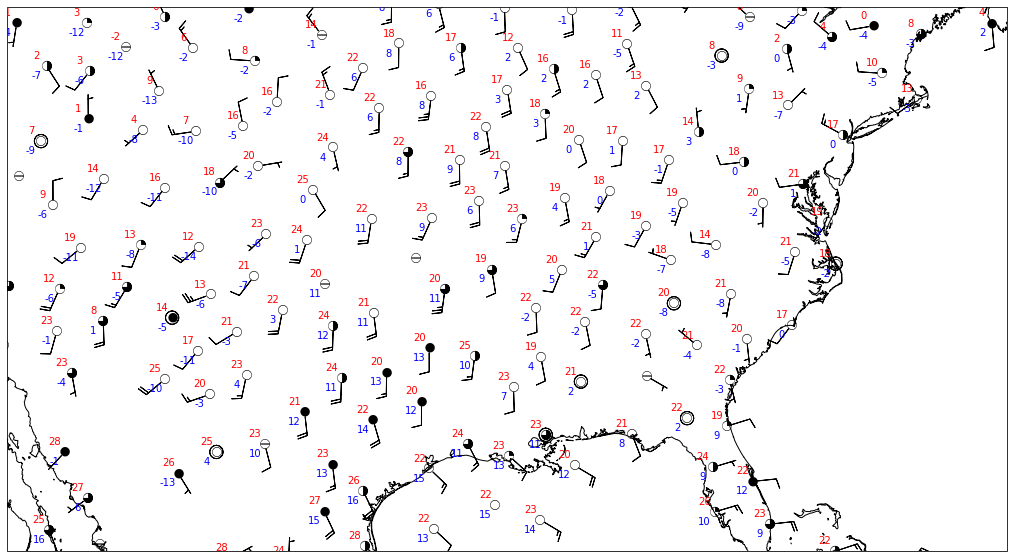

In [94]:
# Create an array of station locations
locs = rtma_crs.transform_points(ccrs.PlateCarree(), sfc_data['longitude'].m, sfc_data['latitude'].m)

# Create the 1:175 km plot mask
plot_mask = mpcalc.reduce_point_density(locs[..., :2], 175000)

# Increase the size of the plot on the screen
fig = plt.figure(figsize=(20, 10))

# Create matplotlib axes in the Plate Carree projection
ax = fig.add_subplot(projection=rtma_crs)

# Create the StationPlot class with the plot_mask applied 
# (append [plot_mask] to the end of each variable)
stn = mpplots.StationPlot(ax, sfc_data['longitude'][plot_mask].m, sfc_data['latitude'][plot_mask].m, transform=ccrs.PlateCarree(), clip_on=True)

# ACTIVITY: Apply plot_mask
# Populate all variables as previous, but apply the plot_mask
# this time. The temperature field is completed for you. 
# Continue with dewpoint, cloud coverage, wx_code, and the 
# wind barb.
stn.plot_parameter('NW', sfc_data['air_temperature'][plot_mask], color='red')
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][plot_mask], color='blue')
stn.plot_symbol('C', sfc_data['cloud_coverage'][plot_mask], mpplots.sky_cover)
stn.plot_symbol('E', sfc_data['wx_code'][plot_mask], mpplots.current_weather, color='blue')

# Populate the wind bard
stn.plot_barb(sfc_data['u'][plot_mask], sfc_data['v'][plot_mask])

# Finishing touches
ax.coastlines('10m')
ax.set_extent((-113, -70, 25, 45))

## Step 5: Create multi-layer plot <a class="anchor" id="step5"></a>
[Top](#top)

> Now that we have obtained, prepared, and visualized all of the individual datasets, we can now put them all together in a multi-layer plot. Many of the visualization tools you previously used will be again applied here, with the addition of a few other tips to help with the readability of the final map.

In [99]:
# Create axes
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=rtma_crs)

# Plot satellite image:
# regrid_shape controls the detail of the reprojection 
# of the satellite data; a smaller number indicates 
# faster plotting at the expense of detail. 
# Start with 500 to get a general sense of the data, 
# and increase to ~6000 for better quality plots. 
image_extent = (cmi.metpy.x[0], cmi.metpy.x[-1], cmi.metpy.y[0], cmi.metpy.y[-1])
ax.imshow(cmi, extent=image_extent, origin='lower', cmap='Greys_r',
          regrid_shape=6000, transform=cmi.metpy.cartopy_crs)

# Plot theta_e as contours:
ax.contour(theta_e.metpy.x, theta_e.metpy.y, theta_e,
           levels=range(240, 400, 8), colors='tab:blue', 
           transform=theta_e.metpy.cartopy_crs)

# Plot surface observations as a station plot:
# Here we are also adding several readability modifications.
#     path_effects - used to draw the text with a thin 
#                    outline to help it show up better.
#     RGB colors   - used to lighten up the default red  
#                    and blue to make text stand out.
stn = mpplots.StationPlot(ax, sfc_data['longitude'][plot_mask].m, sfc_data['latitude'][plot_mask].m,
                          transform=ccrs.PlateCarree(), fontsize=11, zorder=10, clip_on=True)
stn.plot_parameter('NW', sfc_data['air_temperature'][plot_mask], color=[1.0,0.3,0.3],
                   path_effects=[withStroke(linewidth=1, foreground='black')])
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][plot_mask], color=[0.6,0.6,1.0],
                   path_effects=[withStroke(linewidth=1, foreground='black')])
stn.plot_symbol('C', sfc_data['cloud_coverage'][plot_mask], mpplots.sky_cover, color='white')
stn.plot_symbol('E', sfc_data['wx_code'][plot_mask], mpplots.current_weather, color=[0.6,0.6,1.0],
                   path_effects=[withStroke(linewidth=1, foreground='black')])
stn.plot_barb(sfc_data['u'][plot_mask], sfc_data['v'][plot_mask], color='white')

# Finishing touches, including logo and title
ax.add_feature(cfeature.BORDERS, color='yellow')
ax.add_feature(cfeature.COASTLINE, color='yellow')
ax.set_extent((-113, -70, 25, 45))
ax.set_title(r'GOES-16 Ch. 2, RTMA $\theta_e$, Surface Obs at {:%Y%m%dT%H%M}'.format(dt))
mpplots.add_metpy_logo(fig)

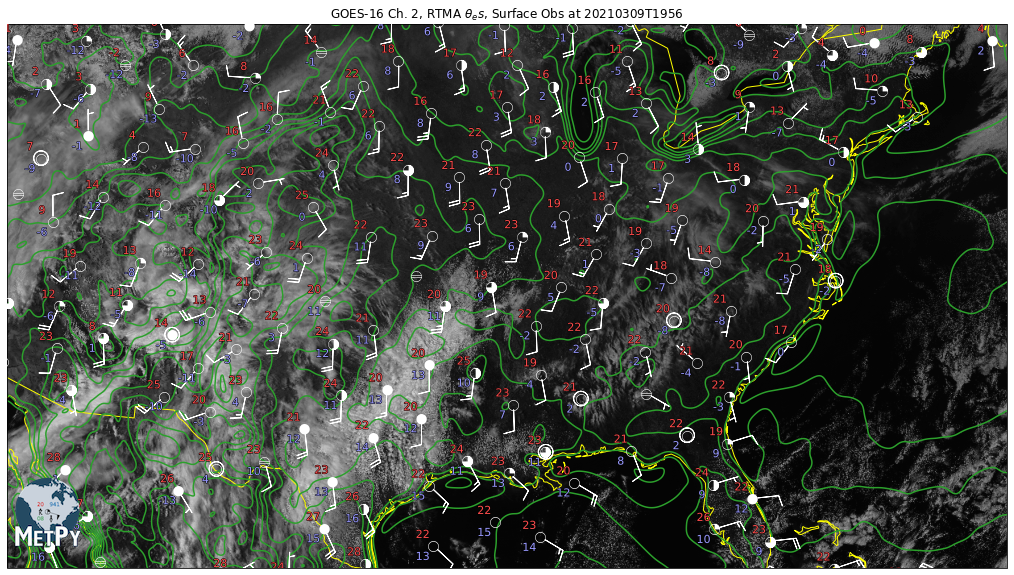

In [100]:
# ACTIVITY: Make the plot your own
# Use the remaining time to stylize your plot to you liking. 
# Use the space below to experiment with your plot. 
# Some ideas:
# - Stylize the title of the plot, changing the size
# - Change the colors of the contours or station plots
# - Add additional variables to the station plots
# - Swap the theta_e contours with another RTMA variable
# Challenges: 
# - Make this a 3-panel plot with 3 separate axes
# - Add labels to your theta_e conturs
# - Review the MetPy example gallery and add elements to your plot
#      https://unidata.github.io/MetPy/latest/examples/index.html

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=rtma_crs)

# Plot satellite image:
# regrid_shape controls the detail of the reprojection 
# of the satellite data; a smaller number indicates 
# faster plotting at the expense of detail. 
# Start with 500 to get a general sense of the data, 
# and increase to ~6000 for better quality plots. 
image_extent = (cmi.metpy.x[0], cmi.metpy.x[-1], cmi.metpy.y[0], cmi.metpy.y[-1])
ax.imshow(cmi, extent=image_extent, origin='lower', cmap='Greys_r',
          regrid_shape=6000, transform=cmi.metpy.cartopy_crs)

# Plot sat_theta_e as contours:
ax.contour(sat_theta_e.metpy.x, sat_theta_e.metpy.y, sat_theta_e,
           levels=range(240, 400, 8), colors='tab:green', 
           transform=sat_theta_e.metpy.cartopy_crs)

# Plot surface observations as a station plot:
# Here we are also adding several readability modifications.
#     path_effects - used to draw the text with a thin 
#                    outline to help it show up better.
#     RGB colors   - used to lighten up the default red  
#                    and blue to make text stand out.
stn = mpplots.StationPlot(ax, sfc_data['longitude'][plot_mask].m, sfc_data['latitude'][plot_mask].m,
                          transform=ccrs.PlateCarree(), fontsize=11, zorder=10, clip_on=True)
stn.plot_parameter('NW', sfc_data['air_temperature'][plot_mask], color=[1.0,0.3,0.3],
                   path_effects=[withStroke(linewidth=1, foreground='black')])
stn.plot_parameter('SW', sfc_data['dew_point_temperature'][plot_mask], color=[0.6,0.6,1.0],
                   path_effects=[withStroke(linewidth=1, foreground='black')])
stn.plot_symbol('C', sfc_data['cloud_coverage'][plot_mask], mpplots.sky_cover, color='white')
stn.plot_symbol('E', sfc_data['wx_code'][plot_mask], mpplots.current_weather, color=[0.6,0.6,1.0],
                   path_effects=[withStroke(linewidth=1, foreground='black')])
stn.plot_barb(sfc_data['u'][plot_mask], sfc_data['v'][plot_mask], color='white')

# Finishing touches, including logo and title
ax.add_feature(cfeature.BORDERS, color='yellow')
ax.add_feature(cfeature.COASTLINE, color='yellow')
ax.set_extent((-113, -70, 25, 45))
ax.set_title(r'GOES-16 Ch. 2, RTMA $\theta_es$, Surface Obs at {:%Y%m%dT%H%M}'.format(dt))
mpplots.add_metpy_logo(fig)

